In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text

# Load Dataset

In [2]:
df = pd.read_csv(r"..\data\holiday_interests_by_country_gender.csv")  

df = (

    # reshape the dataframe from wide to long format
    df.melt(
        id_vars=["gender", "address4"]      # columns to keep fixed (repeated for each row)
    )

    # rename columns for better readability and visualisation
    .rename(
        columns={
            "address4": "country",
            "variable": "holiday_interest",
            "value": "count"
        }
    )

    # optional: clean format of holiday interest names for display
    .assign(
        holiday_interest=lambda x: (
            x["holiday_interest"]
            .str.replace("_Sum", "", regex=False)
            .str.replace("_", " ", regex=False)
            .str.title()
        )
    )

    # group by holiday interest and sum the counts across all entries (analysis excludes gender and country)
    .groupby(["holiday_interest", "gender"])["count"].sum().reset_index()

    # transpose gender values (male/female) into separate columns
    .pivot(
        index="holiday_interest",
        columns="gender",
        values="count"
    )

    # sort by total interest (descending)
    .assign(total=lambda x: x.sum(axis=1, numeric_only=True))   # calculate totals across each row
    .sort_values("total", ascending=False)

    # remove resulting gender index column
    .reset_index().rename_axis(None, axis=1)  
)

df

,holiday_interest,Female,Male,total
0,Scuba Diving,11345,7619,18964
1,Trail Walking,11292,7561,18853
2,Mountaineering,11131,7706,18837
3,Dancing,7645,5116,12761
4,Mountain Biking,7610,5145,12755
5,Sightseeing,7633,5117,12750
6,Hiking,7575,5107,12682
7,Skiing,3931,2629,6560
8,Climbing,3875,2619,6494
9,Snowboarding,3788,2593,6381


# Frequency Counts of Holiday Interests by Gender

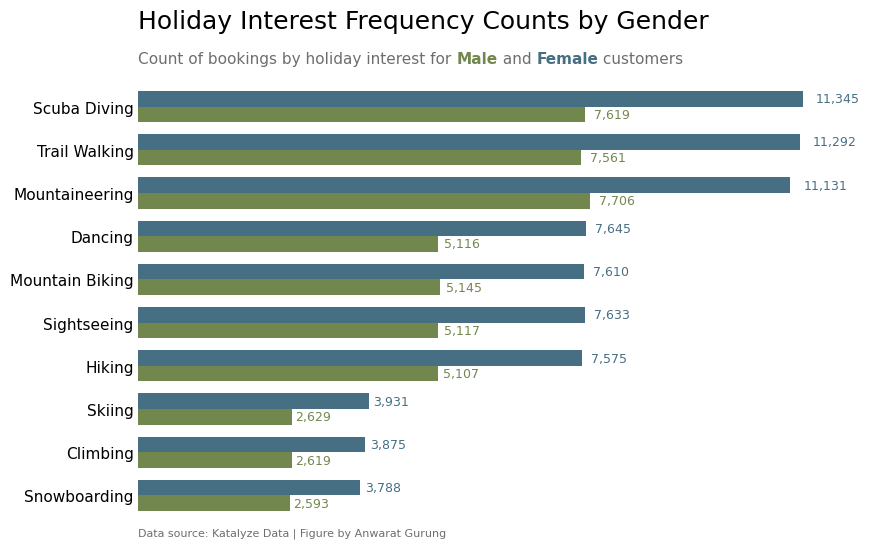

In [3]:
TOP_N = 10              # max 13 unique holiday interests in the dataset

df = df.head(TOP_N).sort_values(by="total")    # filter for the top N holiday interests

# choose a colour palette
cmap = load_cmap("Acadia")
colours = cmap.colors

male_colour = colours[2]
female_colour = colours[3]

fig, ax = plt.subplots(figsize=(9, 6))

# axes customisation
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
ax.tick_params(length=0)
ax.set_xticks([])

# layout parameters
group_spacing = 1.25
bar_height = 0.45
gap = 0

# base y positions for each holiday interest
y_pos = np.arange(df.shape[0]) * group_spacing

# derived bar centres
male_y = y_pos - (bar_height/2 + gap/2)
female_y = y_pos + (bar_height/2 + gap/2)

# plot grouped bars
ax.barh(
    y=male_y,
    width=df["Male"],
    height=bar_height,
    color=male_colour,
)

ax.barh(
    y=female_y,
    width=df["Female"],
    height=bar_height,
    color=female_colour,
)

# holiday interest labels on y-axis
ax.set_yticks(y_pos)
ax.set_yticklabels(df["holiday_interest"], fontsize=11)
ax.tick_params(axis="y", length=0)

# value annotations for grouped bars
for i in range(df.shape[0]):
    male_value = df["Male"].iloc[i]
    female_value = df["Female"].iloc[i]

    ax.text(
        x=male_value * 1.02,
        y=male_y[i],
        s=f"{int(male_value):,}",
        va="center",
        ha="left",
        fontsize=9,
        color=male_colour
    )

    ax.text(
        x=female_value * 1.02,
        y=female_y[i],
        s=f"{int(female_value):,}",
        va="center",
        ha="left",
        fontsize=9,
        color=female_colour
    )

# set main title positioning
x_value, y_value = 0.125, 0.95
fig.text(
    x=x_value, y=y_value,
    s=f"Holiday Interest Frequency Counts by Gender",
    size=18,
)

# chart subtitle
fig_text(
    x=x_value, y=y_value * 0.96,
    s="Count of bookings by holiday interest for <Male> and <Female> customers",
    highlight_textprops=[
        {"color": male_colour, "weight": "bold"},
        {"color": female_colour, "weight": "bold"},
    ],
    fontsize=11,
    color="#6e6e6e"
)

# chart caption
fig.text(
    x_value,
    0.1,
    "Data source: Katalyze Data | Figure by Anwarat Gurung",
    ha="left",
    va="bottom",
    fontsize=8,
    color="#6e6e6e",
)

plt.savefig("../images/holiday_interest_counts_by_gender.png", dpi=200, bbox_inches="tight")

plt.show()